# ⚔️ Project: RPG Class Discovery with PCA
**Goal:** We have stats for 1,000 characters, but we don't know their classes.
**The Data:** 6 Columns (Strength, Agility, Intelligence, etc.).
**The Tool:** Principal Component Analysis (PCA).
**The Mission:** Squash these 6 dimensions down to a 2D map to visualize the "Tribes" of characters.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visual Style
sns.set_style("whitegrid")


df = pd.read_csv("rpg_character_stats.csv")
df.head()

,Strength,Constitution,Agility,Dexterity,Intelligence,Wisdom,Class_Label
0,41.0,35.0,84.0,91.0,38.0,42.0,Rogue
1,19.0,47.0,89.0,94.0,38.0,37.0,Rogue
2,19.0,25.0,38.0,28.0,98.0,67.0,Mage
3,83.0,75.0,27.0,42.0,23.0,13.0,Warrior
4,18.0,42.0,39.0,52.0,87.0,81.0,Mage


### Step 1: Standardization
PCA is sensitive to scale. If one stat is 0-1000 and another is 0-1, PCA will only look at the big one.
We use `StandardScaler` to bring everyone to the same playing field (Mean=0, Variance=1).

In [4]:
# Separate Features (Stats) and Target (Class)
# We ONLY use the Stats for PCA. The 'Class' is just for coloring the plot later.
X = df.drop('Class_Label', axis=1)
y = df['Class_Label']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data Standardized.")

Data Standardized.


### Step 2: Apply PCA
We are asking the algorithm:
*"Find the 2 best angles (Principal Components) to view this 6-dimensional data."*

* **PC1:** The angle with the most variance (information).
* **PC2:** The angle with the second most variance.

In [8]:
# Reduce from 6 columns to 2 columns
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the 2D data
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = y.values # Add labels back just for plotting

print("Dimensions Smashed: 6D -> 2D")
display(pca_df.head())

Dimensions Smashed: 6D -> 2D


,PC1,PC2,Class
0,-0.094372,1.965767,Rogue
1,-0.035986,2.246455,Rogue
2,2.400131,-0.931896,Mage
3,-1.958233,-1.593733,Warrior
4,2.049754,-0.543263,Mage


### Step 3: The 2D Map of Characters
Now we can plot the 1,000 characters on a flat screen.
Watch how the classes separate naturally!

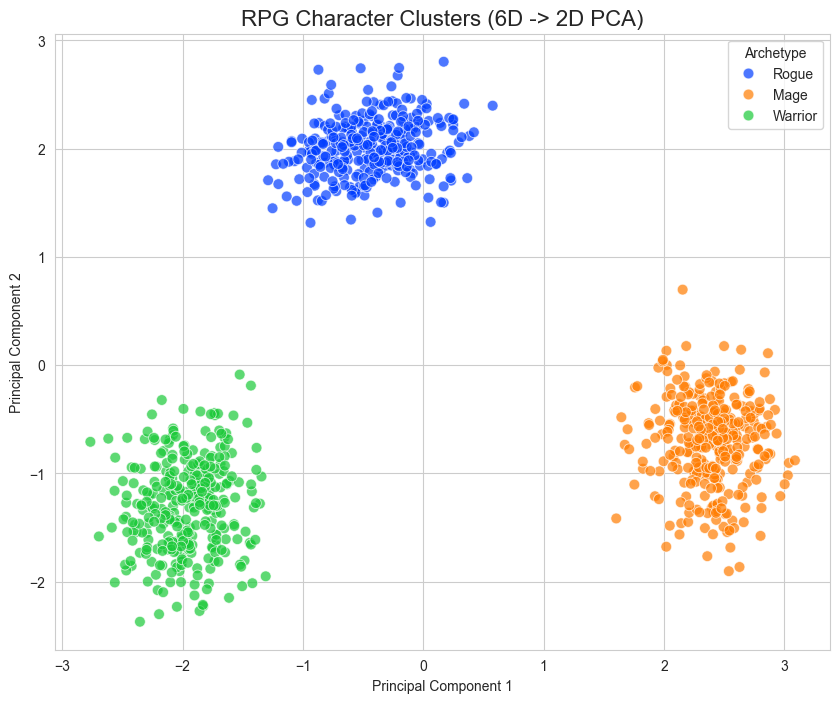

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='bright', s=60, alpha=0.7)

plt.title('RPG Character Clusters (6D -> 2D PCA)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Archetype')
plt.show()

### Step 4: What do PC1 and PC2 actually mean?
PCA isn't magic; it's math.
Let's look at the **Loadings** (which original stats made up the new components).

* **PC1:** Likely separates "Physical" (Str/Con) vs "Magical" (Int/Wis).
* **PC2:** Likely separates "Agile" (Dex/Agl) vs "Heavy" (Str/Con).

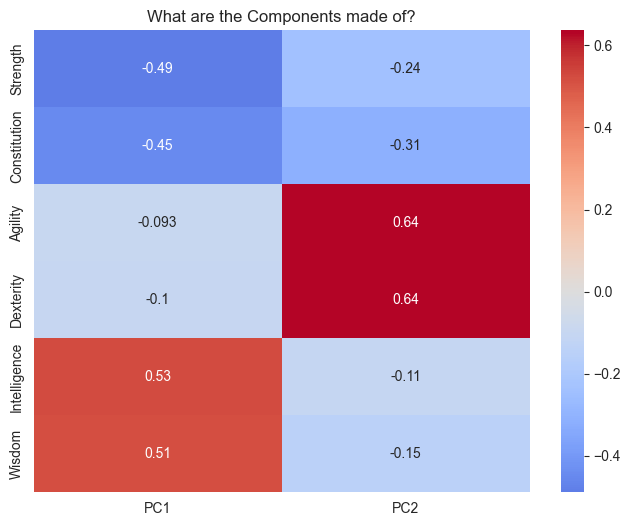

In [11]:
# Create a dataframe of the components vs original features
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('What are the Components made of?')
plt.show()

# 🚀 Conclusion
We successfully took a complex, 6-dimensional dataset and compressed it into a simple 2D chart.

**Key Findings:**
1.  **Distinct Clusters:** The math proved that Warriors, Mages, and Rogues are mathematically distinct entities.
2.  **Information Retained:** By using PCA, we kept the most important relationships (Strength correlates with Constitution) while discarding the noise.

**Business Application:**
This same technique is used to:
* **Finance:** Smash 50 stock indicators down to a "Market Sentiment" index.
* **Genetics:** Visualize relationships between 10,000 genes.
* **Image Processing:** Compress images for facial recognition.